# Downloads and setups

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords as sw
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud
import seaborn as sns
sns.set_theme(style="whitegrid")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1irBkqE5eiRHkTZG4wLlP9FiYMEdtsV86',
                                    dest_path='/content/train.csv')
gdd.download_file_from_google_drive(file_id='1HKCDuGxZ976qrr27EDyG9_MV5OYoa_bK',
                                    dest_path='/content/test.csv')

In [ ]:
train_df = pd.read_csv('/content/train.csv', encoding = 'latin-1', header = None)
test_df = pd.read_csv('/content/test.csv', encoding = 'latin-1', header = None)

# Data Cleaning, Stopword Processing and Tokenizing

The dataset with 1,600,000 data points is far too large to process, so we select a balanced subset of 100,000 data points.

In [ ]:
# Get rid of the columns that we won't use. 
train_df = train_df.drop(train_df.columns[[1, 2, 3, 4]],axis=1)
train_df.rename(columns={train_df.columns[0]: "label", train_df.columns[1]: "text"}, inplace=True)

# Convert the labels into 0/1 in order to better fit the format of binary classification. 
# 0 means negative and 4 means positive. 
train_df['label'] = train_df['label'].apply(lambda x : (int)(x / 4))
train_df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
train_selected = train_df[750000:850000]
num_0 = 0
num_1 = 0
for i in range(len(train_selected)):
  if train_selected.iloc[i, 0] == 0:
    num_0 = num_0 + 1
  if train_selected.iloc[i, 0] == 1:
    num_1 = num_1 + 1
print(num_0)
print(num_1)
train_selected = train_selected.reset_index(drop=True)
train_selected.head()

50000
50000


,label,text
0,0,"@Opotopo small slip on Tryfan few weeks back, ..."
1,0,@Idristwilight You can post HAN when you want....
2,0,@rose_7 Ohh poor jan please tell her that if ...
3,0,Finally home from work...It was a looong day!!...
4,0,im very sad 4 chantelle and tom


In [ ]:
test_selected_1 = train_df[:10000]
test_selected_2 = train_df[1590000:]
test_selected = test_selected_1.append(test_selected_2)
num_0 = 0
num_1 = 0
for i in range(len(test_selected)):
  if test_selected.iloc[i, 0] == 0:
    num_0 = num_0 + 1
  if test_selected.iloc[i, 0] == 1:
    num_1 = num_1 + 1
print(num_0)
print(num_1)
test_selected = test_selected.reset_index(drop=True)
test_selected.head()

10000
10000


,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
validation_selected_1 = train_df[10000:20000]
validation_selected_2 = train_df[1580000:1590000]
validation_selected = validation_selected_1.append(validation_selected_2)
num_0 = 0
num_1 = 0
for i in range(len(validation_selected)):
  if validation_selected.iloc[i, 0] == 0:
    num_0 = num_0 + 1
  if validation_selected.iloc[i, 0] == 1:
    num_1 = num_1 + 1
print(num_0)
print(num_1)
validation_selected = validation_selected.reset_index(drop=True)

10000
10000


In [ ]:
train_small_df = train_df[20000:30000].append(train_df[1570000:1580000]).reset_index(drop=True)
test_small_df = train_df[30000:32000].append(train_df[1568000:1570000]).reset_index(drop=True)
val_small_df = train_df[32000:34000].append(train_df[1566000:1568000]).reset_index(drop=True)

In [ ]:
test_df = test_selected
train_df = train_selected
validation_df = validation_selected

We are going to first convert all the text into lower case.

In [ ]:
train_df['text'] = train_df['text'].apply(lambda text : text.lower())
test_df['text'] = test_df['text'].apply(lambda text : text.lower())
validation_df['text'] = validation_df['text'].apply(lambda text : text.lower())
train_small_df['text'] = train_small_df['text'].apply(lambda text : text.lower())
test_small_df['text'] = test_small_df['text'].apply(lambda text : text.lower())
val_small_df['text'] = val_small_df['text'].apply(lambda text : text.lower())
train_df.head()

,label,text
0,0,"@opotopo small slip on tryfan few weeks back, ..."
1,0,@idristwilight you can post han when you want....
2,0,@rose_7 ohh poor jan please tell her that if ...
3,0,finally home from work...it was a looong day!!...
4,0,im very sad 4 chantelle and tom


Then we are going to use the common stopwords in `nltk.stopwords`.

In [ ]:
# We are going to use the common stopwords in nltk.stopwords
nltk.download('stopwords')
stopwords = set(sw.words('english'))

# import the package for lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

We are going to tokenize the text by first removing the names being mentioned, the tags and the http's and then calling `nltk.word_tokenize` on the cleaned text.

In [ ]:
def tokenize(text):
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  cleaned_words = []
  for word in words:
    # want to remove the @ed names, tags and the http's
    if word.startswith("@") or word.startswith("#") or word.startswith("http"):
      continue
    cleaned_words.append(lemmatizer.lemmatize(word))
  
  cleaned_text = " ".join(cleaned_words)
  tokenized = nltk.word_tokenize(cleaned_text)
  tokenized = [token for token in tokenized if token not in stopwords]
  return tokenized

In [ ]:
train_df['tokenized_text'] = train_df['text'].apply(lambda x: tokenize(x))
train_df['num_tokens'] = train_df['tokenized_text'].apply(lambda x: len(x))
train_df

,label,text,tokenized_text,num_tokens
0,0,"@opotopo small slip on tryfan few weeks back, ...","[small, slip, tryfan, week, back, ,, felt, sid...",20
1,0,@idristwilight you can post han when you want....,"[post, han, want, ., 's, great, !, still, work...",17
2,0,@rose_7 ohh poor jan please tell her that if ...,"[ohh, poor, jan, please, tell, cans, ,, send, ...",12
3,0,finally home from work...it was a looong day!!...,"[finally, home, work, ..., wa, looong, day, !,...",11
4,0,im very sad 4 chantelle and tom,"[im, sad, 4, chantelle, tom]",5
...,...,...,...,...
99995,1,now need 8 followers to compleate 1000 follow...,"[need, 8, follower, compleate, 1000, follow]",6
99996,1,i knew i had to explain something to my friend...,"[knew, explain, something, friend, said, star,...",10
99997,1,done tweeting..... til tomorrow..,"[done, tweeting, ..., .., til, tomorrow..]",6
99998,1,@cmozilo act ii set is pretty breath-taking -l...,"[act, ii, set, pretty, breath-taking, -love, r...",15


In [ ]:
test_df['tokenized_text'] = test_df['text'].apply(lambda x: tokenize(x))
test_df['num_tokens'] = test_df['tokenized_text'].apply(lambda x: len(x))
test_df.head()

,label,text,tokenized_text,num_tokens
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...","[-, awww, ,, 's, bummer, ., shoulda, got, davi...",14
1,0,is upset that he can't update his facebook by ...,"[upset, ca, n't, update, facebook, texting, .....",16
2,0,@kenichan i dived many times for the ball. man...,"[dived, many, time, ball, ., managed, save, 50...",12
3,0,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]",6
4,0,"@nationwideclass no, it's not behaving at all....","[,, 's, behaving, ., 'm, mad, ., ?, ca, n't, s...",12


In [ ]:
validation_df['tokenized_text'] = validation_df['text'].apply(lambda x: tokenize(x))
validation_df['num_tokens'] = validation_df['tokenized_text'].apply(lambda x: len(x))

In [ ]:
train_small_df['tokenized_text'] = train_small_df['text'].apply(lambda x: tokenize(x))
train_small_df['num_tokens'] = train_small_df['tokenized_text'].apply(lambda x: len(x))

In [ ]:
test_small_df['tokenized_text'] = test_small_df['text'].apply(lambda x: tokenize(x))
test_small_df['num_tokens'] = test_small_df['tokenized_text'].apply(lambda x: len(x))

In [ ]:
val_small_df['tokenized_text'] = val_small_df['text'].apply(lambda x: tokenize(x))
val_small_df['num_tokens'] = val_small_df['tokenized_text'].apply(lambda x: len(x))

# Wordcloud
To analyze the most frequent words unique to the positive and negative tweets, we would use a counter to keep track of the counts and then generate two wordclouds.

In [ ]:
from collections import Counter
positive_counter = Counter()
negative_counter = Counter()

for i in range(len(train_df)):
  tokens = train_df.iloc[i][2]
  label = train_df.iloc[i][0]
  for token in tokens:
    if label == 0:
      negative_counter[token] += 1
      positive_counter[token] -= 1
    else:
      negative_counter[token] -= 1
      positive_counter[token] += 1

In [ ]:
print(positive_counter.most_common(10))
print(negative_counter.most_common(10))

[('!', 6347), (',', 2730), ('good', 2211), ('love', 1748), ('thanks', 1710), (';', 1503), ('-', 1365), ('&', 1313), ('great', 1206), ('quot', 1193)]
[('.', 4775), ("n't", 4064), ('...', 2221), ('sad', 2047), ('miss', 1833), ('work', 1541), ('want', 1231), ('ca', 1184), ("'m", 1169), ('go', 1127)]


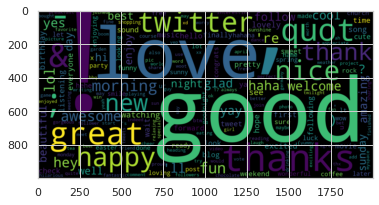

In [ ]:
positive_wordcloud = wordcloud.WordCloud(width=2000, height=1000).generate_from_frequencies(positive_counter)
plt.imshow(positive_wordcloud, interpolation="bilinear")

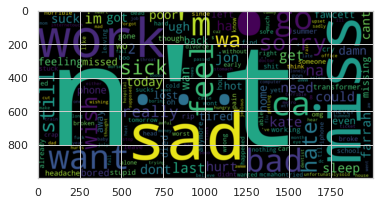

In [ ]:
negative_wordcloud = wordcloud.WordCloud(width=2000, height=1000).generate_from_frequencies(negative_counter)
plt.imshow(negative_wordcloud, interpolation="bilinear")

# Token Length Distribution Against the Label

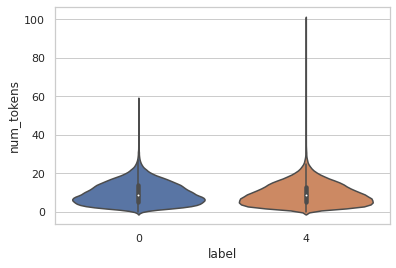

In [ ]:
ax = sns.violinplot(x="label", y="num_tokens", data=train_df)

#Word2vec

In [ ]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
corpus = train_df['tokenized_text'].tolist()
len(corpus)

100000

In [ ]:
model = Word2Vec(corpus, min_count=5, window = 3)
model.most_similar(['happy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('excited', 0.7179142236709595),
 ('jealous', 0.6925813555717468),
 ('party', 0.6545026898384094),
 ('birthday', 0.6528373956680298),
 ('bday', 0.6527419090270996),
 ('lucky', 0.6506863832473755),
 ('nervous', 0.6505507230758667),
 ('sad', 0.6337243318557739),
 ('missing', 0.62849360704422),
 ('loving', 0.6169661283493042)]

In [ ]:
model.similar_by_word('cake', 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('anesti', 0.8982411026954651),
 ('carrot', 0.8931505680084229),
 ('yum', 0.8919219374656677),
 ('mindless', 0.8872406482696533),
 ('palace', 0.8832082152366638),
 ('pancake', 0.8808132410049438),
 ('rice', 0.880324125289917),
 ('spicy', 0.8803125023841858),
 ('egg', 0.8803109526634216),
 ('biscuit', 0.880156397819519),
 ('88', 0.878460168838501),
 ('cocoa', 0.8767523765563965),
 ('chai', 0.8767238855361938),
 ('phoenix', 0.8763140439987183),
 ('cross', 0.8750360012054443),
 ('miami', 0.8743449449539185),
 ('homemade', 0.8732529878616333),
 ('spice', 0.8727977275848389),
 ('greek', 0.8713781833648682),
 ('north', 0.8700557947158813)]

In [ ]:
model['cat']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.03307868, -0.17736839,  0.16049795,  0.05961573,  0.18164936,
        0.17887905,  0.072179  ,  0.34524998,  0.19430381,  0.3122497 ,
       -0.1496185 , -0.02760169, -0.05579575,  0.13920912, -0.2370587 ,
       -0.5583633 , -0.36577427,  0.07583626, -0.23919295, -0.24303548,
        0.49259746,  0.2678082 , -0.3883255 , -0.13301496, -0.0013976 ,
       -0.05843661, -0.26623017, -0.5880421 ,  0.3787821 , -0.07576375,
        0.4177747 ,  0.18017648, -0.13129143,  0.35200226,  0.2166281 ,
        0.08555627, -0.00531522,  0.05519994,  0.4970042 , -0.11404945,
        0.34267402, -0.20059517, -0.14668937, -0.39167187, -0.17319278,
        0.1012482 , -0.19778748, -0.3094759 , -0.46459475, -0.10095147,
       -0.07669846, -0.03195113, -0.03009909, -0.4729178 , -0.41012567,
       -0.00571031, -0.08838785, -0.26163974, -0.15224265,  0.63378906,
        0.23701514,  0.06825908, -0.06017636,  0.03058429,  0.21620265,
        0.08300854,  0.12887399, -0.05306461,  0.05889766, -0.27

##TSNE visualization of word vectors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[  30.085165  ,   51.02437   ],
       [  31.62603   ,  -21.709373  ],
       [-115.59357   ,   91.37591   ],
       [ -80.09809   ,  -38.399483  ],
       [ -46.18889   ,  139.39514   ],
       [  32.75964   ,  124.12077   ],
       [-151.14848   ,    4.769986  ],
       [-137.83173   ,  -77.91672   ],
       [  -0.62434185, -146.03056   ],
       [ -72.58205   , -121.38781   ],
       [ -84.229256  ,   28.863533  ],
       [ 110.06515   ,  -57.712112  ],
       [  88.451324  , -134.68983   ],
       [ -22.724764  ,  -67.53102   ],
       [ 101.3683    ,   85.93863   ],
       [  83.4023    ,   12.833111  ],
       [  40.749554  ,  -84.032845  ],
       [ -23.889082  ,    3.2728207 ],
       [ 152.45609   ,   10.067234  ],
       [ -31.252617  ,   71.42689   ]], dtype=float32)

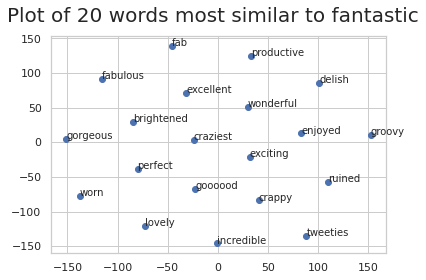

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# function to pick the first k words similar to the given word and visualize
def visualize_k(input_word, k):
  tsne = TSNE(n_components=2)
  list_of_words = model.similar_by_word(input_word, k)
  list_of_words = [item[0] for item in list_of_words]
  vector_list = [model[word].tolist() for word in list_of_words]
  vector_arr = np.array(vector_list)
  twodvec = tsne.fit_transform(vector_arr)
  twodlist = twodvec.tolist()
  x_axis = [item[0] for item in twodlist]
  y_axis = [item[1] for item in twodlist]
  plt.scatter(x_axis, y_axis)
  for i, word in enumerate(list_of_words):
    plt.annotate(word, (x_axis[i], y_axis[i]))
  plt.suptitle(f"Plot of {k} words most similar to {input_word}", fontsize = 20)
  return twodvec
visualize_k('fantastic', 20)

In [ ]:
y_train_org = train_df['label'].tolist()

In [ ]:
#corpus = np.array(corpus)
def doc_vec(document, labels):
  vec_list = []
  label_list = []
  for i in range(len(document)):
    row = document[i]
    row_filtered = [word for word in row if word in model.wv.vocab]
    vec_filtered = []
    for j in range(len(row_filtered)):
      vec_filtered.append(model[row_filtered[j]])
    mean_vec = np.mean(vec_filtered, axis = 0)
    mean_vec = mean_vec.tolist()
    if isinstance(mean_vec, list):
      vec_list.append(mean_vec)
      label_list.append(labels[i])
  return vec_list, label_list

X_train, y_train = doc_vec(corpus, y_train_org)
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(99434, 100)
(99434,)


In [ ]:
test_sent = test_df['tokenized_text'].tolist()

y_test_org = test_df['label'].tolist()

X_test, y_test = doc_vec(test_sent, y_test_org)

X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape)
print(y_test.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(19884, 100)
(19884,)


In [ ]:
val_text = validation_df['tokenized_text'].tolist()
val_labels = validation_df['label'].tolist()
X_val, y_val = doc_vec(val_text, val_labels)
X_val = np.array(X_val)
y_val = np.array(y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
train_small_text = train_small_df['tokenized_text'].tolist()
train_small_labels = train_small_df['label'].tolist()
X_train_small, y_train_small = doc_vec(train_small_text, train_small_labels)
X_train_small = np.array(X_train_small)
y_train_small = np.array(y_train_small)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
test_small_text = test_small_df['tokenized_text'].tolist()
test_small_labels = test_small_df['label'].tolist()
X_test_small, y_test_small = doc_vec(test_small_text, test_small_labels)
X_test_small = np.array(X_test_small)
y_test_small = np.array(y_test_small)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
val_small_text = val_small_df['tokenized_text'].tolist()
val_small_labels = val_small_df['label'].tolist()
X_val_small, y_val_small = doc_vec(val_small_text, val_small_labels)
X_val_small = np.array(X_val_small)
y_val_small = np.array(y_val_small)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Logistic Regression

In [ ]:
# try different values of C
c_vals = [0.01, 0.1, 1, 10, 100, 200, 500]
train_accs = []
val_accs = []
for c_val in c_vals:
  clf = LogisticRegression(C=c_val, max_iter=1000).fit(X_train, y_train)
  y_pred_val = clf.predict(X_val)
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  val_acc = accuracy_score(y_pred_val, y_val)
  train_accs.append(train_acc)
  val_accs.append(val_acc)

print(train_accs)
print(val_accs)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.6755033489550858, 0.6869782971619366, 0.6978699438823742, 0.7038336987348391, 0.7053724078283082, 0.7053221232174105, 0.7054930908944627]
[0.6628597303280338, 0.6707587039645804, 0.6736767961360435, 0.6784061179311732, 0.6785067417991547, 0.6779533105252565, 0.6787583014691084]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
clf = LogisticRegression(C=100, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_pred, y_test)
print(f"training accuracy: {train_acc}")
print(f"test accuracy: {test_acc}")

training accuracy: 0.7053724078283082
test accuracy: 0.6861798430899215


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Naive Bayes 

Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
train_acc = accuracy_score(y_train, gnb.predict(X_train))
val_acc = accuracy_score(y_val, gnb.predict(X_val))
test_acc = accuracy_score(y_pred, y_test)
print(f"training accuracy for Gaussian NB: {train_acc}")
print(f"validation accuracy for Gaussian NB: {val_acc}")
print(f"test accuracy for Gaussian NB: {test_acc}")

training accuracy for Gaussian NB: 0.6114809823601585
validation accuracy for Gaussian NB: 0.6198430267659489
test accuracy for Gaussian NB: 0.6290484811909073


Bernoulli

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train, y_train)
y_pred = bnb.predict(X_test)
train_acc = accuracy_score(y_train, bnb.predict(X_train))
val_acc = accuracy_score(y_val, bnb.predict(X_val))
test_acc = accuracy_score(y_pred, y_test)
print(f"training accuracy for Bernoulli NB: {train_acc}")
print(f"validation accuracy for Bernoulli NB: {val_acc}")
print(f"test accuracy for Bernoulli NB: {test_acc}")

training accuracy for Bernoulli NB: 0.6093690287024559
validation accuracy for Bernoulli NB: 0.6179311732743007
test accuracy for Bernoulli NB: 0.6280929390464696


# SVM

RBF Kernel, even weight:

In [ ]:
from sklearn import svm
svc = svm.SVC().fit(X_train_small, y_train_small)
y_pred_small = svc.predict(X_val_small)
val_acc = accuracy_score(y_pred_small, y_val_small)
train_acc = accuracy_score(y_train_small, svc.predict(X_train_small))
print(f"training accuracy for RBF kernel SVM: {train_acc}")
print(f"validation accuracy for RBF kernel SVM: {val_acc}")

training accuracy for RBF kernel SVM: 0.7151905097014175
validation accuracy for RBF kernel SVM: 0.7171615500754907


RBF Kernel, balanced weight:

In [ ]:
from sklearn import svm
svc = svm.SVC(class_weight='balanced').fit(X_train_small, y_train_small)
y_pred_small = svc.predict(X_val_small)
val_acc = accuracy_score(y_pred_small, y_val_small)
train_acc = accuracy_score(y_train_small, svc.predict(X_train_small))
print(f"training accuracy for balanced RBF kernel SVM: {train_acc}")
print(f"validation accuracy for balanced RBF kernel SVM: {val_acc}")

training accuracy for balanced RBF kernel SVM: 0.7151905097014175
validation accuracy for balanced RBF kernel SVM: 0.7174131857070961


Linear Kernel, even weight:

In [ ]:
svc = svm.SVC(kernel='linear').fit(X_train_small, y_train_small)
y_pred_small = svc.predict(X_val_small)
val_acc = accuracy_score(y_pred_small, y_val_small)
train_acc = accuracy_score(y_train_small, svc.predict(X_train_small))
print(f"training accuracy for linear kernel SVM: {train_acc}")
print(f"validation accuracy for linear kernel SVM: {val_acc}")

training accuracy for linear kernel SVM: 0.689051975469991
validation accuracy for linear kernel SVM: 0.7088575742325113


Linear Kernel, balanced weight:

In [ ]:
svc = svm.SVC(kernel='linear', class_weight='balanced').fit(X_train_small, y_train_small)
y_pred_small = svc.predict(X_val_small)
val_acc = accuracy_score(y_pred_small, y_val_small)
train_acc = accuracy_score(y_train_small, svc.predict(X_train_small))
print(f"training accuracy for balanced linear kernel SVM: {train_acc}")
print(f"validation accuracy for balanced linear kernel SVM: {val_acc}")

training accuracy for balanced linear kernel SVM: 0.6887503769980898
validation accuracy for balanced linear kernel SVM: 0.7088575742325113


Polynomial Kernel:

In [ ]:
svc = svm.SVC(kernel='poly').fit(X_train_small, y_train_small)
y_pred_small = svc.predict(X_val_small)
val_acc = accuracy_score(y_pred_small, y_val_small)
train_acc = accuracy_score(y_train_small, svc.predict(X_train_small))
print(f"training accuracy for polynomial kernel SVM: {train_acc}")
print(f"validation accuracy for polynomial kernel SVM: {val_acc}")

training accuracy for polynomial kernel SVM: 0.716899567708857
validation accuracy for polynomial kernel SVM: 0.7093608454957222


Polynomial Kernel, balanced weight:

In [ ]:
svc = svm.SVC(kernel='poly', class_weight='balanced').fit(X_train_small, y_train_small)
y_pred_small = svc.predict(X_val_small)
val_acc = accuracy_score(y_pred_small, y_val_small)
train_acc = accuracy_score(y_train_small, svc.predict(X_train_small))
print(f"training accuracy for polynomial kernel SVM: {train_acc}")
print(f"validation accuracy for polynomial kernel SVM: {val_acc}")

training accuracy for polynomial kernel SVM: 0.716899567708857
validation accuracy for polynomial kernel SVM: 0.7096124811273277


Model Chosen: Polynomial, even

In [ ]:
svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
test_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"test accuracy for polynomial kernel SVM: {test_acc}")

# Decision Tree

In [ ]:
from sklearn import tree

max_depth = [3, 5, 7, 9, 11, 13]
train_accs = []
val_accs = []
for depth in max_depth:
  dt = tree.DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
  train_acc = accuracy_score(y_train, dt.predict(X_train))
  val_acc = accuracy_score(y_val, dt.predict(X_val))
  train_accs.append(train_acc)
  val_accs.append(val_acc)

print(train_accs)
print(val_accs)

[0.604551762978458, 0.6294426453728101, 0.6503208158175272, 0.6803910131343404, 0.7236257215841664, 0.7822676348130418]
[0.605755685248541, 0.6122459247333467, 0.6212517609176896, 0.6231636144093379, 0.6230126786073656, 0.6146608975649024]


In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=9).fit(X_train, y_train)
train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"training accuracy for decision tree: {train_acc}")
print(f"test accuracy for decision tree: {test_acc}")

training accuracy for decision tree: 0.68040107005652
test accuracy for decision tree: 0.6353349426674714


Text(0, 0.5, 'validation accuracy')

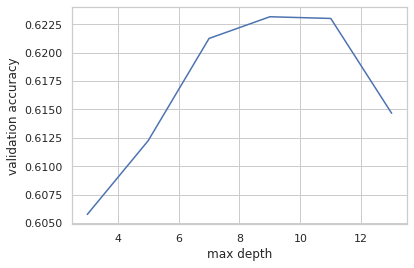

In [ ]:
plt.plot(max_depth, val_accs)
plt.xlabel("max depth")
plt.ylabel("validation accuracy")

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10).fit(X_train, y_train)
train_predicted = rf.predict(X_train)
test_predicted = rf.predict(X_test)
train_predicted = np.array([int(round(item)) for item in train_predicted.tolist()])
test_predicted = np.array([int(round(item)) for item in test_predicted.tolist()])
train_acc = accuracy_score(y_train, train_predicted)
test_acc = accuracy_score(y_test, test_predicted)
print(f"training accuracy for random forest: {train_acc}")
print(f"test accuracy for random forest: {test_acc}")

training accuracy for random forest: 0.9825512400185047
test accuracy for random forest: 0.642174612753973


# AdaBoost

Text(0, 0.5, 'validation accuracy')

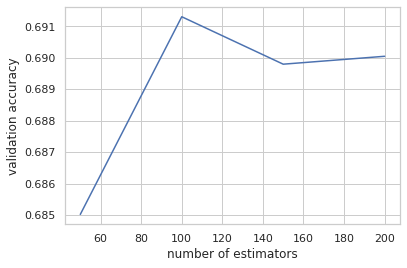

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
n_est = [50, 100, 150, 200]
train_accs = []
val_accs = []

for n_estimators in n_est:
  ada = AdaBoostClassifier(n_estimators=n_estimators).fit(X_train_small, y_train_small)
  train_acc = accuracy_score(y_train_small, ada.predict(X_train_small))
  val_acc = accuracy_score(y_val_small, ada.predict(X_val_small))
  
  train_accs.append(train_acc)
  val_accs.append(val_acc)

plt.plot(n_est, val_accs)
plt.xlabel("number of estimators")
plt.ylabel("validation accuracy")

In [ ]:
print(train_accs)
print(val_accs)

[0.678228522595888, 0.6915497913839039, 0.7002463178002313, 0.7041672950284019]
[0.6850175967823027, 0.6913021618903972, 0.6897938662644545, 0.6900452488687783]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
train_acc = accuracy_score(y_train, ada.predict(X_train))
test_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"training accuracy for AdaBoost: {train_acc}")
print(f"test accuracy for AdaBoost: {test_acc}")

training accuracy for AdaBoost: 0.6742462336826438
test accuracy for AdaBoost: 0.6588211627439147


# LSTM

## Constructing LSTM

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# get a list of words by appending everything in the train and test dfs
word_list = []
train_list = []
test_list = []
maxlength = 0
len_sum = 0
word_list.append(" ")
for i in range(len(train_small_df)):
  sublist = train_df.iloc[i][2]
  train_list.append(sublist)
  len_sum += len(sublist)
  if len(sublist) > maxlength:
    maxlength = len(sublist)
  for j in range(len(sublist)):
    word_list.append(sublist[j])
for i in range(len(test_small_df)):
  sublist = test_df.iloc[i][2]
  test_list.append(sublist)
  if len(sublist) > maxlength:
    maxlength = len(sublist)
  for j in range(len(sublist)):
    word_list.append(sublist[j])
print(len(word_list))
print(maxlength)
print(len(train_list))
print(len(test_list))
print(f"avg_length:{len_sum / len(train_small_df)}")

237041
58
20000
4000
avg_length:9.87425


In [ ]:
# construct a dictionary out of the list of words so that each word corresponds
# to an integer
word_dict = dict.fromkeys(word_list)
value_list = []
for i in range(len(word_dict)):
  value_list.append(i)
word_dict = dict(zip(word_dict, value_list))
input_size = len(word_dict)
print(len(word_dict))
word_dict

23412


{' ': 0,
 'small': 1,
 'slip': 2,
 'tryfan': 3,
 'week': 4,
 'back': 5,
 ',': 6,
 'felt': 7,
 'side': 8,
 'pull': 9,
 'didnt': 10,
 'think': 11,
 'wa': 12,
 'bad': 13,
 '.': 14,
 'muscle': 15,
 'went': 16,
 'ribs': 17,
 '2': 18,
 'post': 19,
 'han': 20,
 'want': 21,
 "'s": 22,
 'great': 23,
 '!': 24,
 'still': 25,
 'working': 26,
 'tld': 27,
 'though': 28,
 'got': 29,
 'little': 30,
 'distracted': 31,
 'sorry': 32,
 'ohh': 33,
 'poor': 34,
 'jan': 35,
 'please': 36,
 'tell': 37,
 'cans': 38,
 'send': 39,
 'u': 40,
 'email': 41,
 'finally': 42,
 'home': 43,
 'work': 44,
 '...': 45,
 'looong': 46,
 'day': 47,
 'monday': 48,
 'im': 49,
 'sad': 50,
 '4': 51,
 'chantelle': 52,
 'tom': 53,
 'chatted': 54,
 'someone': 55,
 'online': 56,
 'apple': 57,
 'store': 58,
 'said': 59,
 'would': 60,
 'better': 61,
 'buy': 62,
 'new': 63,
 'one': 64,
 "n't": 65,
 '$': 66,
 '200': 67,
 'waste': 68,
 'office': 69,
 'empty': 70,
 'aircon': 71,
 'water': 72,
 'tank': 73,
 'give': 74,
 'much': 75,
 'time': 

In [ ]:
# for sentences with lengths less than maxlength, pad them with spaces
for i in range(len(train_list)):
  while len(train_list[i])<maxlength:
      train_list[i].append(" ")
for i in range(len(test_list)):
  while len(test_list[i])<maxlength:
      test_list[i].append(" ")
train_seq = []
test_seq = []
for i in range(len(train_list)):
  instance = []
  for j in range(maxlength):
    instance.append(word_dict.get(train_list[i][j]))
  train_seq.append(instance)
for i in range(len(test_list)):
  instance = []
  for j in range(maxlength):
    instance.append(word_dict.get(test_list[i][j]))
  test_seq.append(instance)
train_seq = np.array(train_seq)
test_seq = np.array(test_seq)

In [ ]:
# normalize data
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_seq)
test_scaled = scaler.fit_transform(test_seq)

In [ ]:
# turn data into tensors for the lstm model
y_train_small = train_small_df['label'].tolist()
y_test_small = test_small_df['label'].tolist()
y_train_small = [[item] for item in y_train_small]
y_test_small = [[item] for item in y_test_small]
y_train_small = np.array(y_train_small)
y_test_small = np.array(y_test_small)
train_data = TensorDataset(torch.from_numpy(train_scaled), torch.from_numpy(y_train_small))
test_data = TensorDataset(torch.from_numpy(test_scaled), torch.from_numpy(y_test_small))
train_loader = DataLoader(train_data, shuffle=True, batch_size=200)
test_loader = DataLoader(test_data, shuffle=True, batch_size=200)

In [ ]:
# construct the lstm class
class LSTM(nn.Module):
  def __init__(self, hidden_dim, input_size=input_size, batch_size=200, hidden_size=50, embedding_dim=128, output_size=1, num_layers=3):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.hidden_dim = hidden_dim
    self.output_size = output_size
    self.num_layers = num_layers
    self.embedding_dim = embedding_dim
    self.batch_size = batch_size
    self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
    self.linear = nn.Linear(hidden_size, output_size)
    self.dropout = nn.Dropout(p = 0.7)
    self.embedding = nn.Embedding(self.input_size, self.embedding_dim)
    self.act = nn.Sigmoid()
  
  def forward(self, x, hidden):
    embedded = self.embedding(x)
    lstm_out, hidden = self.lstm(embedded, hidden)
    out = self.linear(lstm_out[:,-1,:])
    out = self.dropout(out)
    out = self.act(out)
    return out, hidden

  def init_hidden(self, batch_size):
    hidden = (torch.zeros(self.num_layers,self.hidden_dim,self.hidden_size), torch.zeros(self.num_layers,self.hidden_dim,self.hidden_size))
    return hidden

In [ ]:
# define the train function, train data and report loss in each epoch
# we use BCELoss and Adam optimizer
device = torch.device("cpu")
clf = LSTM(hidden_dim = 200)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=0.0001)
clf.train(False)
def train(num_epoch, train_loader, model):
  n = 0
  hidden = model.init_hidden(200)
  for i in range(num_epoch):
    for inputs, labels in train_loader:
      hidden = tuple([each.data for each in hidden])
      inputs = inputs.type(torch.LongTensor)
      outputs, hidden = model(inputs, hidden)
      optimizer.zero_grad()
      loss = criterion(outputs, labels.float())
      loss.backward(retain_graph=True)
      optimizer.step()
      if n % 40 == 0:
        print(f"epoch{i+1} loss: {loss.item()}")
      n = n + 1
    model.train()
train(20, train_loader, clf)

epoch1 loss: 0.695676326751709
epoch1 loss: 0.6935936808586121
epoch1 loss: 0.6936751008033752
epoch2 loss: 0.6930432319641113
epoch2 loss: 0.6930053234100342
epoch3 loss: 0.6929691433906555
epoch3 loss: 0.6925639510154724
epoch3 loss: 0.6937702894210815
epoch4 loss: 0.692216694355011
epoch4 loss: 0.6928344964981079
epoch5 loss: 0.6929423809051514
epoch5 loss: 0.6931465268135071
epoch5 loss: 0.6937225461006165
epoch6 loss: 0.6929765939712524
epoch6 loss: 0.6935455799102783
epoch7 loss: 0.6929688453674316
epoch7 loss: 0.6915950179100037
epoch7 loss: 0.6932154297828674
epoch8 loss: 0.6932409405708313
epoch8 loss: 0.693149745464325
epoch9 loss: 0.6933330297470093
epoch9 loss: 0.6934217214584351
epoch9 loss: 0.6934117078781128
epoch10 loss: 0.6929531693458557
epoch10 loss: 0.6929721236228943
epoch11 loss: 0.6932545304298401
epoch11 loss: 0.6916311383247375
epoch11 loss: 0.6929497718811035
epoch12 loss: 0.6928845047950745
epoch12 loss: 0.6914705038070679
epoch13 loss: 0.6926928758621216
epo

In [ ]:
def test(test_loader, clf):
  hidden = clf.init_hidden(200)
  acc_list = []
  loss_list = []
  for inputs, labels in test_loader:
    inputs = inputs.type(torch.LongTensor)
    outputs, hidden = clf(inputs, hidden)
    loss = criterion(outputs, labels.float())
    predicted = torch.round(outputs)
    partial_acc = accuracy_score(predicted.detach().numpy(), labels.detach().numpy())
    acc_list.append(partial_acc)
    loss_list.append(loss)
  accuracy = sum(acc_list)/len(acc_list)
  avg_loss = sum(loss_list) / len(loss_list)
  print(acc_list)
  print(f"accuracy: {accuracy}")
  print(f"average loss: {avg_loss}")
  return accuracy, avg_loss
test(test_loader, clf)

[0.53, 0.505, 0.505, 0.435, 0.505, 0.55, 0.41, 0.48, 0.455, 0.575, 0.535, 0.505, 0.49, 0.535, 0.525, 0.5, 0.505, 0.51, 0.455, 0.49]
accuracy: 0.5000000000000001
average loss: 0.6931555271148682


(0.5000000000000001, tensor(0.6932, grad_fn=<DivBackward0>))

## Finetuning LSTM

### Reduce the length of input sentences

Since the average length of input sentences is around 9 words (while the maximum length is 100), forcing the input length to be 100 while padding most values with zeros seems unecessary.

In [ ]:
# take only first 30 values instead of 100
train_seq_30 = [item[:30] for item in train_seq.tolist()]
test_seq_30 = [item[:30] for item in test_seq.tolist()]
train_seq_30 = np.array(train_seq_30)
test_seq_30 = np.array(test_seq_30)

In [ ]:
# normalize data
scaler = StandardScaler()
train_scaled_30 = scaler.fit_transform(train_seq_30)
test_scaled_30 = scaler.fit_transform(test_seq_30)

In [ ]:
train_data = TensorDataset(torch.from_numpy(train_scaled_30), torch.from_numpy(y_train_small))
test_data = TensorDataset(torch.from_numpy(test_scaled_30), torch.from_numpy(y_test_small))
train_loader = DataLoader(train_data, shuffle=True, batch_size=200)
test_loader = DataLoader(test_data, shuffle=True, batch_size=200)

In [ ]:
# redo the train and test process, this time with the simplified version of data
clf30 = LSTM(hidden_dim = 200)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=0.0001)
clf30.train()
train(20, train_loader, clf30)
test(test_loader, clf30)

epoch1 loss: 0.6910938024520874
epoch1 loss: 0.695119321346283
epoch1 loss: 0.7003160119056702
epoch2 loss: 0.6921438574790955
epoch2 loss: 0.6929240226745605
epoch3 loss: 0.6972301006317139
epoch3 loss: 0.6917324662208557
epoch3 loss: 0.6949474811553955
epoch4 loss: 0.7006251811981201
epoch4 loss: 0.6953303813934326
epoch5 loss: 0.687863290309906
epoch5 loss: 0.6937644481658936
epoch5 loss: 0.6999947428703308
epoch6 loss: 0.6992708444595337
epoch6 loss: 0.6983131170272827
epoch7 loss: 0.696662425994873
epoch7 loss: 0.6912817358970642
epoch7 loss: 0.6966648101806641
epoch8 loss: 0.691596508026123
epoch8 loss: 0.6969224810600281
epoch9 loss: 0.6925387382507324
epoch9 loss: 0.6976532936096191
epoch9 loss: 0.6892935037612915
epoch10 loss: 0.6933934688568115
epoch10 loss: 0.7010675072669983
epoch11 loss: 0.6844342947006226
epoch11 loss: 0.6877307295799255
epoch11 loss: 0.6982244849205017
epoch12 loss: 0.6894842386245728
epoch12 loss: 0.696932852268219
epoch13 loss: 0.693794846534729
epoch1

(0.495, tensor(0.6955, grad_fn=<DivBackward0>))

### One-hot encode labels

In [ ]:
# one-hot encode labels
encoder = OneHotEncoder()
y_train_small = train_small_df['label'].tolist()
y_test_small = test_small_df['label'].tolist()
y_train_small = [[item] for item in y_train_small]
y_test_small = [[item] for item in y_test_small]
y_train_encoded = encoder.fit_transform(y_train_small)
y_test_encoded = encoder.fit_transform(y_test_small)

In [ ]:
# build the new classifier with an added softmax layer
class lstmCLF(nn.Module):
  def __init__(self, hidden_dim, input_size=input_size, batch_size=200, hidden_size=50, embedding_dim=128, output_size=2, num_layers=3):
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.num_layers = num_layers
    self.embedding_dim = embedding_dim
    self.batch_size = batch_size
    self.lstm = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_size, num_layers = num_layers, batch_first=True)
    self.linear = nn.Linear(hidden_size, output_size)
    self.dropout = nn.Dropout(p = 0.7)
    self.hidden_dim = hidden_dim
    self.embedding = nn.Embedding(self.input_size, self.embedding_dim)
    self.act = nn.Sigmoid()
    self.softmax = nn.Softmax()
  
  def forward(self, x, hidden):
    embedded = self.embedding(x)
    lstm_out, hidden = self.lstm(embedded, hidden)
    out = self.linear(lstm_out[:,-1,:])
    out = self.dropout(out)
    out = self.act(out)
    out = self.softmax(out)
    return out, hidden

  def init_hidden(self, batch_size):
    hidden = (torch.zeros(self.num_layers,self.hidden_dim,self.hidden_size), torch.zeros(self.num_layers,self.hidden_dim,self.hidden_size))
    return hidden

In [ ]:
# load data
y_train_arr = y_train_encoded.toarray()
y_test_arr = y_test_encoded.toarray()
train_data = TensorDataset(torch.from_numpy(train_scaled_30), torch.from_numpy(y_train_arr))
test_data = TensorDataset(torch.from_numpy(test_scaled_30), torch.from_numpy(y_test_arr))
train_loader = DataLoader(train_data, shuffle=True, batch_size=200)
test_loader = DataLoader(test_data, shuffle=True, batch_size=200)

In [ ]:
# train with the new model and record train accuracy
device = torch.device("cpu")
clf = lstmCLF(hidden_dim = 200, hidden_size=16, embedding_dim=64)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=0.0001)
clf.train(False)
def train(num_epoch, train_loader, model):
  n = 0
  acc_list_train = []
  hidden = model.init_hidden(200)
  for i in range(num_epoch):
    acc_list = []
    for inputs, labels in train_loader:
      hidden = tuple([each.data for each in hidden])
      inputs = inputs.type(torch.LongTensor)
      outputs, hidden = model(inputs, hidden)
      predicted = [np.argmax(item) for item in outputs.detach().numpy()]
      y_true = [np.argmax(item) for item in labels.detach().numpy()]
      partial_acc = accuracy_score(np.array(predicted), np.array(y_true))
      acc_list.append(partial_acc)
      optimizer.zero_grad()
      loss = criterion(outputs, labels)
      loss.backward(retain_graph=True)
      optimizer.step()
      if n % 40 == 0:
        print(f"epoch{i+1} loss: {loss.item()}")
      n = n + 1
    avg_acc = sum(acc_list) / len(acc_list)
    acc_list_train.append(avg_acc)
    model.train()
  return acc_list_train
train(40, train_loader, clf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch1 loss: 0.7246735236048698
epoch1 loss: 0.7243971906602382
epoch1 loss: 0.7240227696299553
epoch2 loss: 0.7246370771527291
epoch2 loss: 0.7251080999523402
epoch3 loss: 0.7234942042827606
epoch3 loss: 0.7246348550915718
epoch3 loss: 0.7231694405525922
epoch4 loss: 0.7233200735598803
epoch4 loss: 0.7242094616591931
epoch5 loss: 0.7238519739359617
epoch5 loss: 0.7241512107104063
epoch5 loss: 0.724868630245328
epoch6 loss: 0.724658684656024
epoch6 loss: 0.7245521097630262
epoch7 loss: 0.7235691515356302
epoch7 loss: 0.7235402286052703
epoch7 loss: 0.72398387812078
epoch8 loss: 0.7238039978593588
epoch8 loss: 0.7241737547516823
epoch9 loss: 0.7239749323576689
epoch9 loss: 0.7241961808502674
epoch9 loss: 0.7240912710875272
epoch10 loss: 0.7240648421645165
epoch10 loss: 0.7241185975819826
epoch11 loss: 0.7240789767354727
epoch11 loss: 0.7240410563349724
epoch11 loss: 0.7240606866776943
epoch12 loss: 0.724083838313818
epoch12 loss: 0.7240500926971436
epoch13 loss: 0.7240761202573777
epoch

[0.4999999999999998,
 0.5000000000000001,
 0.49999999999999983,
 0.5,
 0.4999999999999998,
 0.49999999999999983,
 0.5000000000000001,
 0.5,
 0.5,
 0.4980499999999999,
 0.49644999999999995,
 0.5,
 0.49999999999999994,
 0.49999999999999983,
 0.4999999999999997,
 0.49999999999999994,
 0.5,
 0.49999999999999983,
 0.5021,
 0.5420000000000003,
 0.55,
 0.55645,
 0.5619499999999998,
 0.5656999999999999,
 0.5637000000000003,
 0.5607499999999999,
 0.5759,
 0.5736000000000002,
 0.5756999999999999,
 0.5832,
 0.5864,
 0.58235,
 0.5868,
 0.5918500000000002,
 0.5960499999999999,
 0.59785,
 0.6058499999999998,
 0.6026499999999999,
 0.6076000000000004,
 0.6041999999999998]

In [ ]:
def test(test_loader):
  hidden = clf.init_hidden(200)
  acc_list = []
  loss_list = []
  for inputs, labels in test_loader:
    encoder = OneHotEncoder()
    inputs = inputs.type(torch.LongTensor)
    outputs, hidden = clf(inputs, hidden)
    loss = criterion(outputs, labels.squeeze().float())
    predicted = [np.argmax(item) for item in outputs.detach().numpy()]
    predicted = np.array([[item] for item in predicted])
    predicted = encoder.fit_transform(predicted).toarray()
    partial_acc = accuracy_score(predicted, labels.detach().numpy())
    acc_list.append(partial_acc)
    loss_list.append(loss)
  accuracy = sum(acc_list) / len(acc_list)
  avg_loss = sum(loss_list) / len(loss_list)
  print(f"accuracy: {accuracy}")
  print(f"average loss: {avg_loss}")
  return accuracy
test(test_loader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserW

accuracy: 0.5385000000000001
average loss: 0.7193856239318848


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.5385000000000001

### adjust hidden_size, embedding_dim and lr

See the report for a chart of experiment results

In [ ]:
device = torch.device("cpu")
clf = lstmCLF(hidden_dim = 200, hidden_size=30, embedding_dim=64)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=0.0001)
clf.train(False)
acc_list = train(100, train_loader, clf)
test(test_loader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


epoch1 loss: 0.7239920128881931
epoch1 loss: 0.7243587931245565
epoch1 loss: 0.7239294053614139
epoch2 loss: 0.7237347456812858
epoch2 loss: 0.7243115025013686
epoch3 loss: 0.7250235180556774
epoch3 loss: 0.72378668487072
epoch3 loss: 0.7243662381917239
epoch4 loss: 0.7245798520743847
epoch4 loss: 0.7241492831707
epoch5 loss: 0.7246417315304279
epoch5 loss: 0.7236798783391714
epoch5 loss: 0.7240204851329327
epoch6 loss: 0.7243489427119494
epoch6 loss: 0.7241975092887878
epoch7 loss: 0.7237618084996938
epoch7 loss: 0.7238265890628099
epoch7 loss: 0.7237923833727836
epoch8 loss: 0.7232696501165629
epoch8 loss: 0.7234785067290068
epoch9 loss: 0.7232832775264978
epoch9 loss: 0.7232926364988088
epoch9 loss: 0.7141948483139277
epoch10 loss: 0.7169203811883926
epoch10 loss: 0.7129698028415441
epoch11 loss: 0.7117350377887487
epoch11 loss: 0.7204481760412454
epoch11 loss: 0.7133881568908691
epoch12 loss: 0.7176883251965046
epoch12 loss: 0.7106828413903713
epoch13 loss: 0.7172617759555578
epoch

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserW

accuracy: 0.5385
average loss: 0.7199745178222656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.5385

In [ ]:
acc_list

[0.49999999999999994,
 0.5001000000000001,
 0.49750000000000005,
 0.5011000000000001,
 0.5005,
 0.49670000000000014,
 0.5094999999999998,
 0.5358999999999998,
 0.54625,
 0.5681499999999998,
 0.5637000000000001,
 0.5739000000000002,
 0.5784999999999997,
 0.5787499999999998,
 0.5795500000000002,
 0.58805,
 0.5853999999999999,
 0.5878,
 0.5929499999999998,
 0.5859,
 0.5969500000000002,
 0.6011500000000002,
 0.5999999999999998,
 0.5629500000000001,
 0.5999999999999999,
 0.5986,
 0.5931500000000001,
 0.5977,
 0.5999499999999998,
 0.6047500000000001,
 0.5988500000000002,
 0.6048499999999999,
 0.6035500000000003,
 0.6069999999999995,
 0.6096000000000003,
 0.6077999999999998,
 0.6019000000000002,
 0.6010499999999999,
 0.6036000000000002,
 0.6067499999999999,
 0.6111500000000002,
 0.59915,
 0.6076,
 0.6048499999999999,
 0.6083000000000003,
 0.6113999999999999,
 0.6098999999999999,
 0.5705500000000001,
 0.5674000000000006,
 0.6063500000000002,
 0.6104499999999997,
 0.5842,
 0.6046999999999998,
 

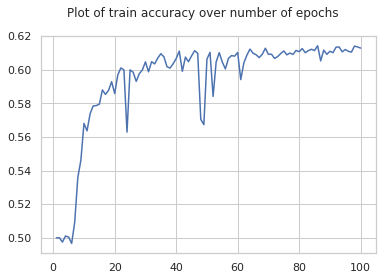

In [ ]:
def visualize_acc(acc_list):
  epochs = list(range(1, len(acc_list)+1))
  plt.plot(epochs, acc_list)
  plt.suptitle("Plot of train accuracy over number of epochs")
visualize_acc(acc_list)

#citation

Aneesha Bakharia, "Using TSNE to Plot a Subset of Similar Words from Word2Vec", November 27, 2017

https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

Aravind Pai, "Build Your First Text Classification Model Using Pytorch", January 28, 2020

https://www.analyticsvidhya.com/blog/2020/01/first-text-classification-in-pytorch/

Gal Hever, "Semtiment Analysis with Pytorch", April 11, 2020

https://medium.com/@galhever/sentiment-analysis-with-pytorch-part-4-lstm-bilstm-model-84447f6c4525

The App Solutions, "Why Business Applies Sentiment Analysis?"

https://theappsolutions.com/blog/development/sentiment-analysis-for-business/

Usman Malik, "Time Series Prediction using LSTM with PyTorch in Python"

https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/

Wenhu Chen, Yu Su, Yilin Shen, Zhiyu Chen, Xifeng Yan, William Wang, *How Large a Vocabulary Does Text Classification Need? A Variational Approach to Vocabulary Selection*, University of California, Santa Barbara, Ohio State University, Samsung Research, June 2019

https://www.aclweb.org/anthology/N19-1352.pdf